# Electricity Generation Analysis Tool for Highest-Load and Lowest-Load Hours

### Manager's Request: 
Create two charts that show the share of electricity produced by each fuel type during the highest-load and lowest-load hours of each day for the year 2020.

### Summary:
This project is to create a tool that will analyze and visualize electricity generation data by fuel type, time of day, and load. The tool will produce two charts: one showing the share of electricity produced by each fuel type during the highest-load hour of each day, and one showing the same statistic for the lowest-load hour of the day

## Importing libraries for data analysis and visualization

To load, analyze and visualize the data, I imported the following libraries:

* Pandas
* NumPy
* Matplotlib
* Seaborn
* requests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sns.set(style="ticks")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading and Preprocessing the Data

The first step in the analysis is to load the data into a Pandas DataFrame. The data is in a CSV file called `GenMix_2017.csv`.

Next, we need to change the data type of the `GMT MKT Interval` column to Python datetime format and set it as the index of the DataFrame. We also create a new column called `Date` to represent the date of each record.

We also check for duplicate observations and missing values, and drop them if needed.

There are two types of columns (self and market) in the raw data, so we combine them into a single column.

Finally, we remove the spaces in the column titles and rearrange the columns for ease of use. This could be done in previous part too when we were assigning new columns.

Once the data has been loaded and preprocessed, it is ready to be analyzed.

In [2]:
#Loading the data into dataframe
#df=pd.read_csv("GenMix_2020.csv")

# Get data from https://marketplace.spp.org/pages/generation-mix-historical
req = requests.get('https://marketplace.spp.org/file-browser-api/download/generation-mix-historical?path=%2FGenMix_2020.csv', verify = False)
req_content = req.content

csv = open('C:\\temp\\data.csv', 'wb')
csv.write(req_content)
df = pd.read_csv('C:\\temp\\data.csv')


#print(df.duplicated().sum()) #checking for duplicate observations
#print(df.isna().sum()) #checking for null (missing) values

# Drop NaN values from rows
df = df.dropna(axis=0)

#changing the data type of the timestamp into python datetime format and setting it to the index + creating a column to represent the day
df['GMT MKT Interval']=pd.to_datetime(df['GMT MKT Interval'])
df['Date']=df['GMT MKT Interval'].dt.date
df = df.set_index('GMT MKT Interval')

#there are two types of columns (self and market) in the raw data, so I just added them together and stored it in a new column
df[' Coal'] = df[' Coal Market']+df[' Coal Self']
df[' Diesel Fuel Oil'] = df[' Diesel Fuel Oil Market'] + df[' Diesel Fuel Oil Self']
df[' Hydro'] = df[' Hydro Market'] + df[' Hydro Self']
df[' Natural Gas'] = df[' Natural Gas Market'] + df[' Gas Self']
df[' Nuclear'] = df[' Nuclear Market'] + df[' Nuclear Self']
df[' Solar']=df[' Solar Market'] + df[' Solar Self']
df[' Waste Disposal Services'] = df[' Waste Disposal Services Market'] + df[' Waste Disposal Services Self']
df[' Wind'] = df[' Wind Market'] + df[' Wind Self']
df[' Waste Heat'] = df[' Waste Heat Market'] + df[' Waste Heat Self']
df[' Other'] = df[' Other Market'] + df[' Other Self']



# getting rid of the spaces in the column titles
df=df.rename(columns={'Date':'Date',' Coal':'Coal', ' Diesel Fuel Oil':'Diesel_Fuel_Oil', ' Hydro':'Hydro',
       ' Natural Gas':'Natural_Gas', ' Nuclear':'Nuclear', ' Solar':'Solar', ' Waste Disposal Services':'Waste_Disposal_Services',
       ' Wind':'Wind', ' Waste Heat':'Waste_Heat', ' Other':'Other', ' Load':'Average_Actual_Load'})

#selecting the column that we want to work with and rearrange the columns for ease of use
df=df[['Coal','Diesel_Fuel_Oil', 'Hydro', 'Natural_Gas',
       'Nuclear', 'Solar', 'Waste_Disposal_Services', 'Wind', 'Waste_Heat',
       'Other', 'Average_Actual_Load', 'Date']]



/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1015: InsecureRequestWarning: Unverified HTTPS request is being made to host 'marketplace.spp.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1015: InsecureRequestWarning: Unverified HTTPS request is being made to host 'portal.spp.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


## Aggregating the Data to Hourly Intervals

The time stamps in the data are collected every 5 minutes, but we are interested in analyzing the data on a hourly basis. To do this, we can use the `resample()` function from Pandas.

The `resample()` function aggregates the data in a DataFrame over a specified time interval. In this case, we want to aggregate the data to hourly intervals.

We also need to specify how to aggregate each column in the DataFrame. To do this, we create an aggregation dictionary. The keys in the dictionary are the column names, and the values are the aggregation functions to apply.

The `last` aggregation function is used for the `Date` column to ensure that the date of each record is preserved.

Once the data has been aggregated to hourly intervals, it is ready to be analyzed.



In [3]:
agg_dictionary={
        'Coal':'mean',
        'Diesel_Fuel_Oil':'mean', 
        'Hydro':'mean',
        'Natural_Gas':'mean',
        'Nuclear':'mean', 
        'Solar':'mean', 
        'Waste_Disposal_Services':'mean',
        'Wind':'mean',
        'Waste_Heat':'mean',
        'Other':'mean',
        'Average_Actual_Load':'mean',
        'Date':'last'
}

df = df.resample('H').agg(agg_dictionary).copy()

## Finding the Highest-Load and Lowest-Load Hours

To find the highest-load and lowest-load hours of each day, we use the `groupby()` function from Pandas.

The `groupby()` function groups the data in a DataFrame by one or more columns. In this case, we want to group the data by the `Date` column.

Next, we use the `min()` and `max()` functions to find the minimum and maximum values of the `Average_Actual_Load` column for each day.

These values are stored in `daily_min` and `daily_max` series.

We then use the `isin()` function to filter the data and select the rows where the `Average_Actual_Load` column is equal to the minimum or maximum value for the day.

The `min_daily_data` and `max_daily_data` DataFrames contain the data for the highest-load and lowest-load hours of each day, respectively.

We then use these DataFrames to calculate the share of electricity produced by each fuel type during the highest-load and lowest-load hours of each day.


In [4]:
daily_min=df.groupby(['Date'])['Average_Actual_Load'].min()     # group by date, find min of average actual load
daily_max=df.groupby(['Date'])['Average_Actual_Load'].max()
min_daily_data = df[df['Average_Actual_Load'].isin(daily_min)]  # create data frame with timestamps representing the daily lowest-hour load 
max_daily_data = df[df['Average_Actual_Load'].isin(daily_max)]

## Creating a Line Plot to Visualize the Results for Highest-Load Hours:

To visualize the results, we create a line plot using Matplotlib and Seaborn.

First, we create a filtered DataFrame that only contains the fuel columns. We also transform the data so that the values in each column show the percentages.

Next, we create a line plot using the `sns.lineplot()` function. We pass the filtered DataFrame to the `data` parameter and the fuel columns to the `y` parameter. We also set the `label` parameter for each line to the fuel type.

Finally, we customize the labels, titles, and legend


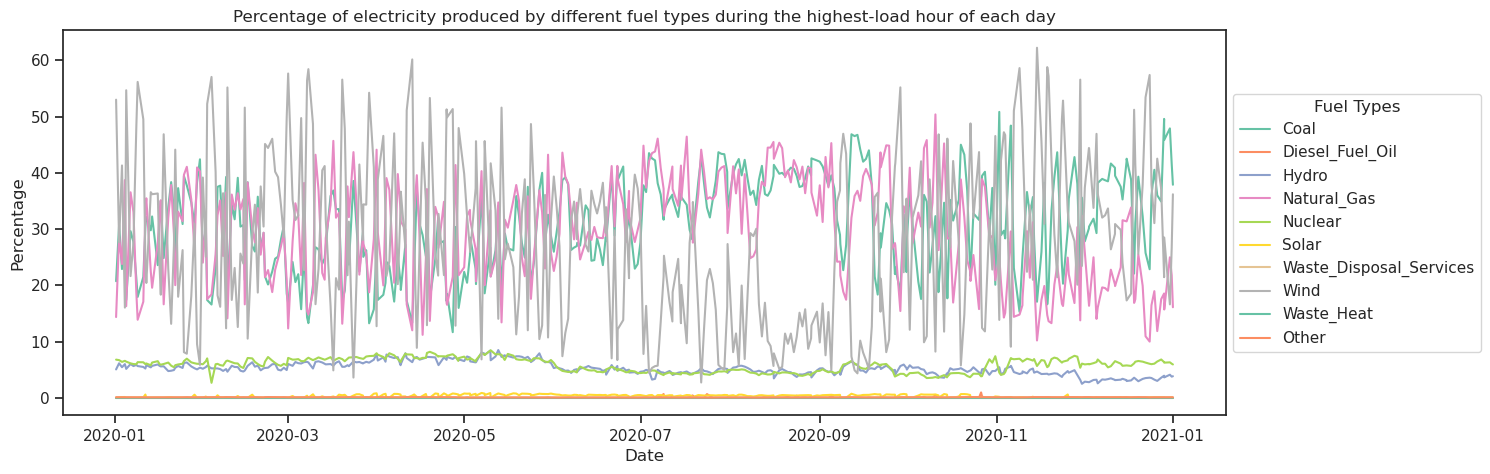

In [5]:
fuel_columns=['Coal', 'Diesel_Fuel_Oil', 'Hydro', 'Natural_Gas', 'Nuclear',
       'Solar', 'Waste_Disposal_Services', 'Wind', 'Waste_Heat', 'Other']


# Calculate the percentage of generation for each time interval (row) for maximum daily load
filtered_df = max_daily_data.filter(fuel_columns)
filtered_df = filtered_df.transform(lambda x: (x / x.sum()) * 100, axis=1)


# Create the line plot
plt.figure(figsize=(15, 5))
palette = sns.color_palette("Set2", len(fuel_columns))  # Using the "Set2" coloring palette of seaborn

for i, fuel_type in enumerate(fuel_columns):
    sns.lineplot(data=filtered_df, x=filtered_df.index, y=fuel_type, label=fuel_type, color=palette[i]) #assiging different color for each line (column)

# Customize labels and titles as needed
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Percentage of electricity produced by different fuel types during the highest-load hour of each day")
plt.grid(False)

# Add a legend to distinguish between different fuel types
plt.legend(title="Fuel Types", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

## Creating a Line Plot to Visualize the Results for Lowest-Load Hours:

To visualize the results, we can create a line plot using Matplotlib and Seaborn.

First, we need to create a filtered DataFrame that only contains the fuel columns. We also need to transform the data so that the values in each column show the percentages.

Next, we can create a line plot using the `sns.lineplot()` function. We pass the filtered DataFrame to the `data` parameter and the fuel columns to the `y` parameter. We also set the `label` parameter for each line to the fuel type.

Finally, we can customize the labels, titles, and legend


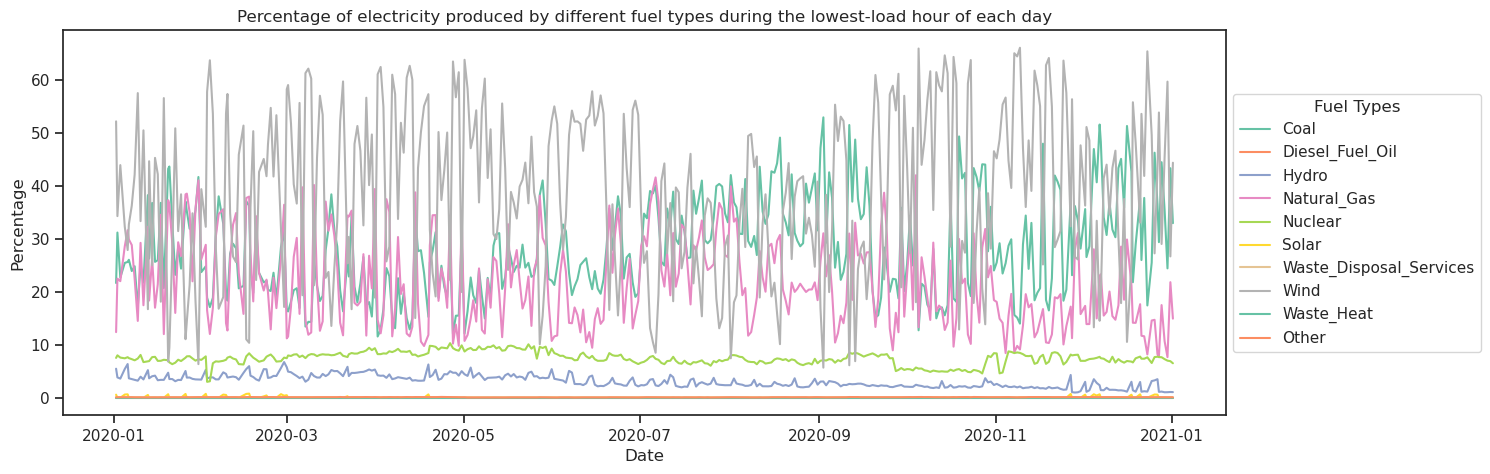

In [6]:
filtered_df = min_daily_data.filter(fuel_columns)
filtered_df = filtered_df.transform(lambda x: (x / x.sum()) * 100, axis=1)


# Create the line plot
plt.figure(figsize=(15, 5))
palette = sns.color_palette("Set2", len(fuel_columns))  # Using the "Set1" predefined palette

for i, fuel_type in enumerate(fuel_columns):
    sns.lineplot(data=filtered_df, x=filtered_df.index, y=fuel_type, label=fuel_type, color=palette[i])

# Customize labels and titles as needed
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Percentage of electricity produced by different fuel types during the lowest-load hour of each day")
plt.grid(False)
# Add a legend to distinguish between different fuel types
plt.legend(title="Fuel Types", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

## Smoothing the Lines Using Moving Averages : Highest-Load Hour

As the previous plots have a high degree of fluctuations, to smooth out the lines in the plots and make them easier to interpret, we use the moving average method.

The moving average method calculates the average of a set of values over a specified window. In this case, we will use a window of 30 days.

To calculate the moving average for each fuel type, we use the `rolling()` and `mean()` functions from Pandas.

Once we have calculated the moving average for each fuel type, we can create a new line plot using the `ma_df` DataFrame.


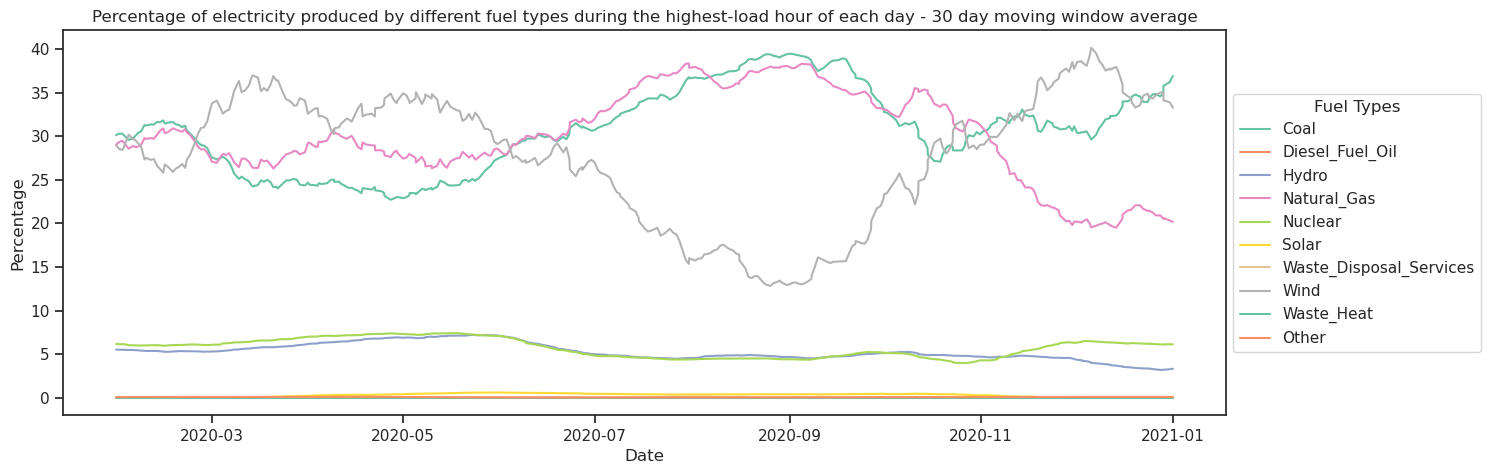

In [7]:
# Calculate the percentage of generation for each time interval (row) for maximum daily load
filtered_df = max_daily_data.filter(fuel_columns)
filtered_df = filtered_df.transform(lambda x: (x / x.sum()) * 100, axis=1)


# Iterate over the fuel types and calculate the moving average for each fuel type
ma_df = pd.DataFrame()
for fuel_column in fuel_columns:
  ma = filtered_df[fuel_column].rolling(window=30).mean()

  # Add the moving average for each fuel type to the new DataFrame
  ma_df[fuel_column] = ma

# Set the column names of the new DataFrame to the fuel types
ma_df.columns = fuel_columns

# Create the line plot
plt.figure(figsize=(15, 5))
palette = sns.color_palette("Set2", len(fuel_columns))  # Using the "Set1" predefined palette

for i, fuel_type in enumerate(fuel_columns):
    sns.lineplot(data=ma_df, x=ma_df.index, y=fuel_type, label=fuel_type, color=palette[i])

# Customize labels and titles as needed
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Percentage of electricity produced by different fuel types during the highest-load hour of each day - 30 day moving window average")
plt.grid(False)
# Add a legend to distinguish different fuel types
plt.legend(title="Fuel Types", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

## Smoothing the Lines Using Moving Averages : Lowest-Load Hour

As the previous plots have a high degree of fluctuations, to smooth out the lines in the plots and make them easier to interpret, we use the moving average method.

The moving average method calculates the average of a set of values over a specified window. In this case, we will use a window of 30 days.

To calculate the moving average for each fuel type, we use the `rolling()` and `mean()` functions from Pandas.

Once we have calculated the moving average for each fuel type, we can create a new line plot using the `ma_df` DataFrame.


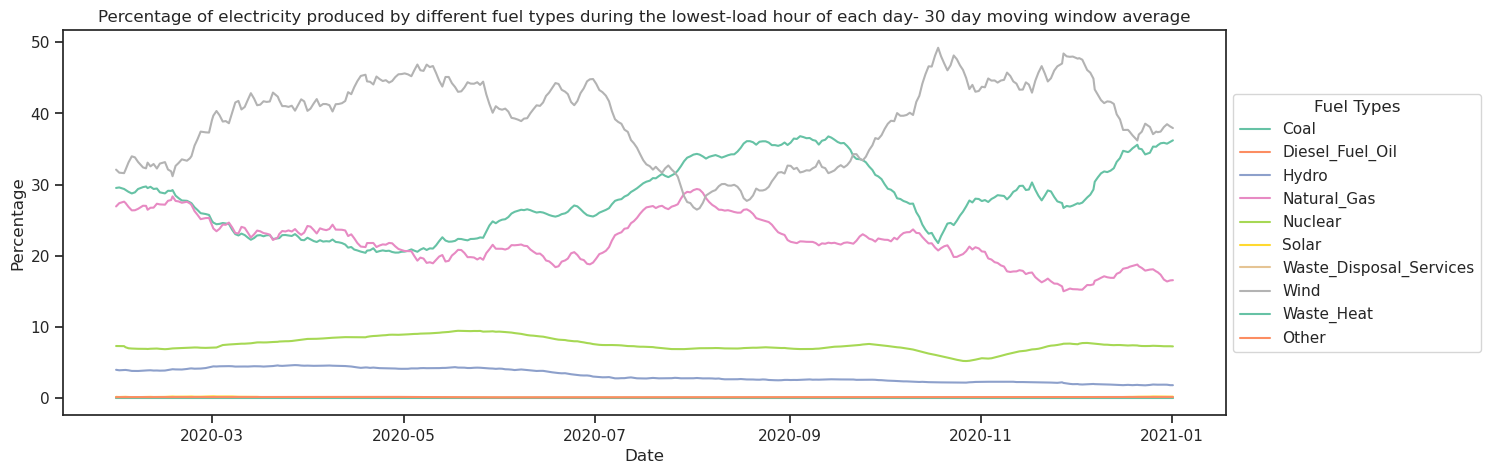

In [8]:
# Calculate the percentage of generation for each time interval (observations) for minumum daily load
filtered_df = min_daily_data.filter(fuel_columns)
filtered_df = filtered_df.transform(lambda x: (x / x.sum()) * 100, axis=1)

# Iterate over the fuel types and calculate the moving average for each fuel type
ma_df = pd.DataFrame()
for fuel_column in fuel_columns:
  ma = filtered_df[fuel_column].rolling(window=30).mean()

  # Add the moving average for each fuel type to the new DataFrame
  ma_df[fuel_column] = ma

# Set the column names of the new DataFrame to the fuel types
ma_df.columns = fuel_columns

# Create the line plot
plt.figure(figsize=(15, 5))
palette = sns.color_palette("Set2", len(fuel_columns))  # Using the "Set1" predefined palette

for i, fuel_type in enumerate(fuel_columns):
    sns.lineplot(data=ma_df, x=ma_df.index, y=fuel_type, label=fuel_type, color=palette[i])

# Customize labels and titles as needed
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Percentage of electricity produced by different fuel types during the lowest-load hour of each day- 30 day moving window average")
plt.grid(False)
# Add a legend to distinguish different fuel types
plt.legend(title="Fuel Types", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


## Summary of Findings for 2020 data
This analysis of electricity generation data from 2020 shows that coal, natural gas, and wind are the three most important fuel types for generating electricity during both the highest-load and lowest-load hours of each day. This was also the case for 2017 data. These three types of fuel have a combined share of 88.6% of electricity market during Highest-Load hours and 89.2% during the Lowest-Load hours. However, there have been some changes in the relative importance of these three fuel types compared to 2017. In particular, the share of wind energy has increased, while the share of coal has decreased.

### Clean vs. Non-Clean Energy Sources

Clean energy sources, such as wind, solar, and hydroelectric power, played a more important role compared to 2017 data in electricity generation during lowest-load hours. On average, clean energy sources generated 42.3% of the load during Lowest-Load hours in 2020 (up from 31.6% in 2017). Also clean energy sources generated 33.7% of the load during highest-load hours in 2020 (up from 25.7% in 2017) mostly due to higher wind usage. 

### Correlation Between Wind and Natural Gas

The analysis also suggests that there is a negative correlation between wind and natural gas. This means that when wind generation is high, natural gas generation is typically low, and vice versa. This correlation is more pronounced during highest-load hours than during lowest-load hours. The figures seem to suggest that the availability of wind as a source of generating electricity has a seasonal component. 


### Directions for possible future investigations

This analysis provides a starting point for understanding the dynamics of electricity generation during high-load and low-load hours, as well as the relationship between wind and natural gas generation. However, there are a number of areas where further research is needed. For example, it would be useful to investigate the following questions:

What are the factors that are driving the growth of wind energy?
What are the factors that improve the integration of wind energy into the electricity grid?
How have recent government policies affected the utilization of clean energy sources in 2022-2023?

By conducting further investigations in these areas, we can develop a better understanding of how to transition to a more sustainable and reliable electricity system.




*Todo : Generating Heatmap*

/tmp/ipykernel_28667/128452417.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


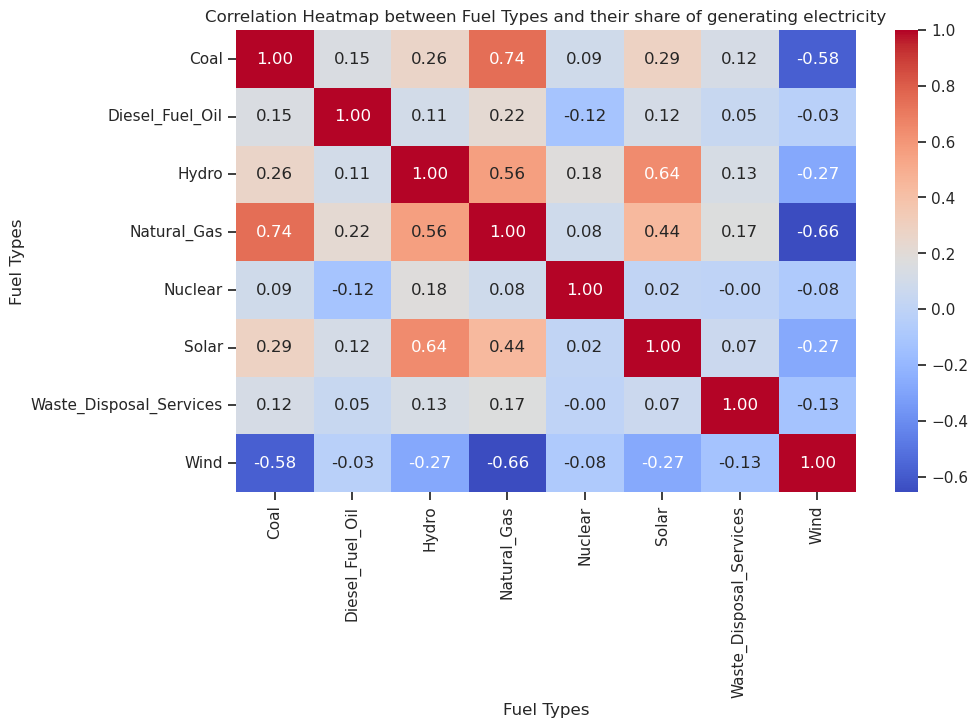

In [192]:
filtered_df = max_daily_data.filter(fuel_columns)
filtered_df = filtered_df.transform(lambda x: (x / x.sum()) * 100, axis=1)

correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.drop(index=['Waste_Heat', 'Average_Actual_Load','Other'], columns=['Waste_Heat','Average_Actual_Load','Other'])

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between Fuel Types and their share of generating electricity')
plt.xlabel('Fuel Types')
plt.ylabel('Fuel Types')
plt.show()


*SCRATCH PAD*

In [179]:
filtered_df = max_daily_data.filter(fuel_columns)
filtered_df = filtered_df.transform(lambda x: (x / x.sum()) * 100, axis=1)
clean_fuels=['Hydro', 'Solar','Wind']
non_clean_fuels= ['Coal','Diesel_Fuel_Oil','Natural_Gas','Nuclear','Waste_Disposal_Services','Waste_Heat']
sum_of_columns = filtered_df[clean_fuels].sum(axis=1)

# Calculate the average of the sum of the three columns
average = sum_of_columns.mean()
print(average)


33.71862784060782
